# Codes from Kaggle
### https://www.kaggle.com/code/kodchalerkmoolkul/customer-churn-prediction-and-clustering-analysis

In [1]:
# Importing modules 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [2]:
#importing datasets
train = pd.read_csv("customer_churn_dataset-training-master.csv")
test = pd.read_csv("customer_churn_dataset-testing-master.csv")

# Combinding the datasets 
df = pd.concat([train, test])

I will skip most of the data inspection and everything in regards to this. You'll find this in the final code file

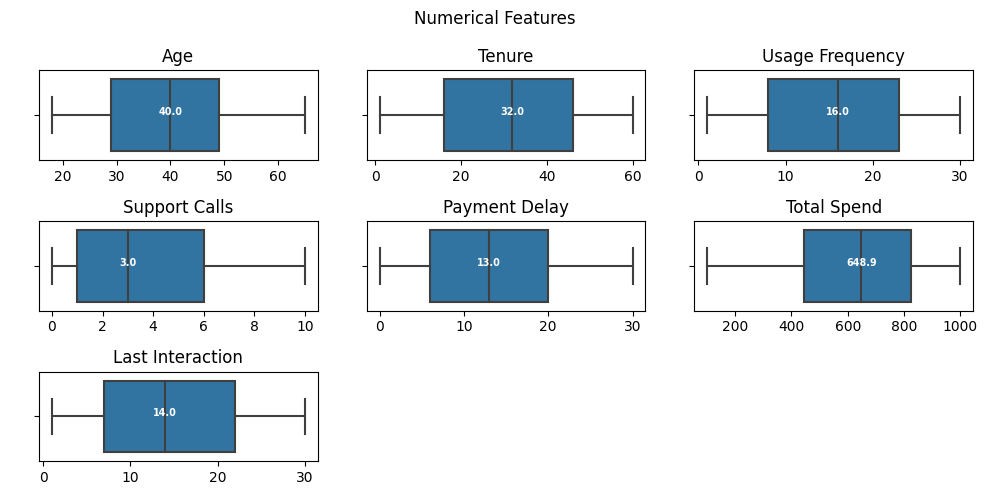

In [33]:
# Check numerical columns
col_features = df.select_dtypes(['float64' , 'int64'])
col_features = col_features[['Age', 'Tenure', 'Usage Frequency', 'Support Calls','Payment Delay', 'Total Spend', 'Last Interaction']]
#Create font


fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features')
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = col_features , x = j)
    #Calculate median
    median = df[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()

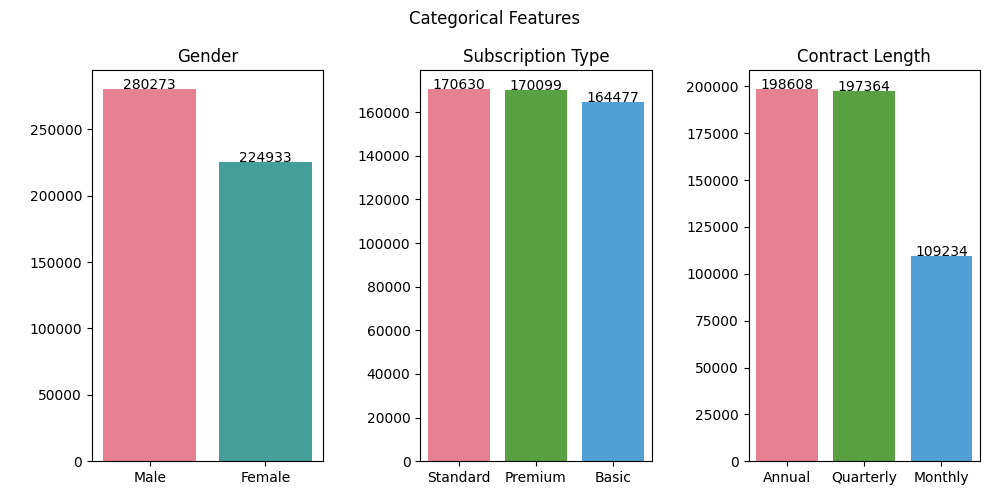

In [34]:
col_categorical = df.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features')
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = df[j].value_counts().sort_values(ascending = False).to_frame() ,x = df[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'husl' )
    #Create text
    text = df[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()

In [3]:
# Drop missing value
df.dropna(axis = 0 , inplace = True)

### KMeans for Systematic pattern recognition 

#### Preprocessing for KMeans

In [21]:
df1 = df.copy()
df1

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [22]:
# Label encode data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])
df1['Subscription Type'] = le.fit_transform(df1['Subscription Type'])
df1['Contract Length'] = le.fit_transform(df1['Contract Length'])
df1

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,0,33.0,12.0,6.0,21.0,0,2,947.0,14.0,1.0
64370,64371.0,37.0,1,6.0,1.0,5.0,22.0,2,0,923.0,9.0,1.0
64371,64372.0,25.0,1,39.0,14.0,8.0,30.0,1,1,327.0,20.0,1.0
64372,64373.0,50.0,0,18.0,19.0,7.0,22.0,2,1,540.0,13.0,1.0


In [23]:
# Drop unused column
df1.drop(columns = 'CustomerID' , inplace = True)

In [24]:
# Scaling the numerical features 
# Numerical features
num = df1[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
           'Payment Delay', 'Total Spend', 'Last Interaction']]

# Scaler 
scaler = StandardScaler()
scaled_num = scaler.fit_transform(num)  # Scale the numerical features

# Replace the original columns with scaled values
df1[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
     'Payment Delay', 'Total Spend', 'Last Interaction']] = scaled_num


df1.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,-0.765883,0,0.443776,-0.198951,0.372314,0.532844,2,0,1.271517,0.277572,1.0
1,1.996425,0,1.023907,-1.707192,1.967923,-0.650423,0,1,-0.257105,-1.000267,1.0
2,1.207194,0,-1.006554,-1.359137,0.691436,0.532844,0,2,-1.773498,-1.348769,1.0
3,1.443963,1,0.385762,0.613178,1.010558,-0.768750,2,1,-0.913393,1.671579,1.0
4,-1.318345,1,0.037683,0.497160,0.372314,-0.650423,0,1,-0.012526,0.626074,1.0


In [101]:
df_cluster = df1[['Usage Frequency','Support Calls','Tenure','Payment Delay','Total Spend']]
df_cluster

,Usage Frequency,Support Calls,Tenure,Payment Delay,Total Spend
0,-0.198951,0.372314,0.443776,0.532844,1.271517
1,-1.707192,1.967923,1.023907,-0.650423,-0.257105
2,-1.359137,0.691436,-1.006554,0.532844,-1.773498
3,0.613178,1.010558,0.385762,-0.768750,-0.913393
4,0.497160,0.372314,0.037683,-0.650423,-0.012526
...,...,...,...,...,...
64369,-0.430988,0.691436,0.095696,0.887824,1.332662
64370,-1.707192,0.372314,-1.470659,1.006150,1.234830
64371,-0.198951,1.329679,0.443776,1.952764,-1.194660
64372,0.381141,1.010558,-0.774501,1.006150,-0.326403


In [117]:
from sklearn.metrics import silhouette_score

In [8]:
# Empyt lists 
elbow_scores = []
silhouette_scores = []
cluster_range = range(1,11)

# Iterate through a range of clusters 
for num_clusters in cluster_range:
    # Create a KMeans instance wiht the current number of clusters 
    km = KMeans(n_clusters=num_clusters)
    # Fit the model to scaled data 
    km.fit(df1)
    # Get the inertia 
    elbow_scores.append(km.inertia_)

C:\Users\fredr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fredr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fredr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

In [18]:
# Calculate the first and second differences of inertia values
first_diff = [elbow_scores[i] - elbow_scores[i - 1] for i in range(1, len(elbow_scores))]
second_diff = [first_diff[i] - first_diff[i - 1] for i in range(1, len(first_diff))]

# Find the "elbow" point by looking for the point with the maximum second difference
optimal_num_clusters = cluster_range[second_diff.index(max(second_diff))]

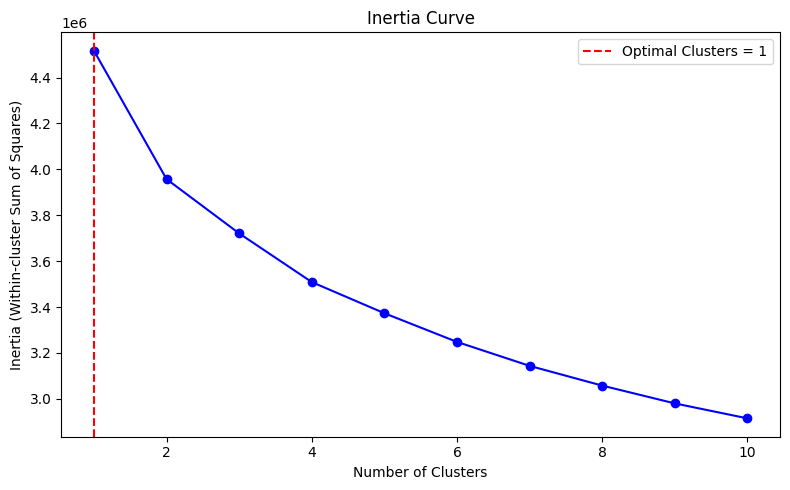

In [20]:
# Plot the inertia curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, elbow_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Inertia Curve')

# Add a vertical dashed red line to visualize the optimal number of clusters
plt.axvline(x=optimal_num_clusters, color='r', linestyle='--', label=f'Optimal Clusters = {optimal_num_clusters}')
plt.legend()

plt.tight_layout()
plt.show()


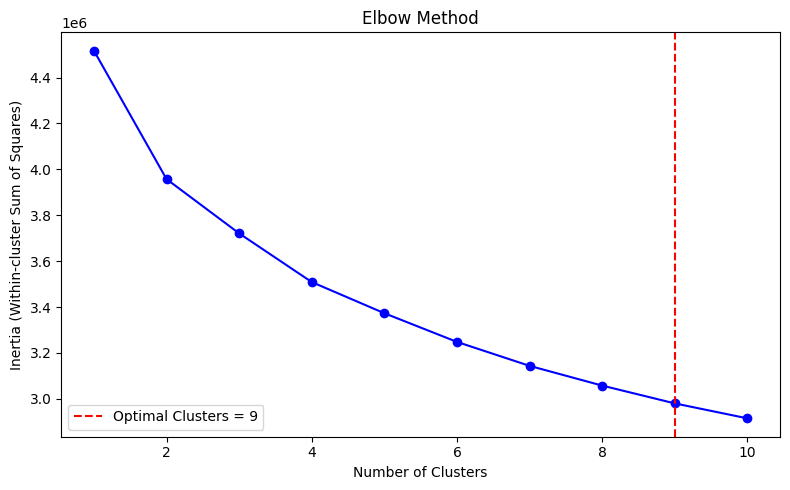

In [10]:
# Plot the elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, elbow_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')

# Find the "elbow" point (optimal number of clusters)
# The elbow point is where the inertia starts to decrease at a slower rate
# You can use a simple heuristic like looking for the point with the maximum curvature
diff = [elbow_scores[i] - elbow_scores[i - 1] for i in range(1, len(elbow_scores))]
optimal_num_clusters = cluster_range[diff.index(max(diff))]

# Add a vertical line to visualize the optimal number of clusters
plt.axvline(x=optimal_num_clusters, color='r', linestyle='--', label=f'Optimal Clusters = {optimal_num_clusters}')
plt.legend()

plt.tight_layout()
plt.show()

#### KMeans clustering

In [25]:

from kneed import KneeLocator


inertia = []
num_clusters = list(range(1,10))

for k in num_clusters:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)

C:\Users\fredr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fredr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fredr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

In [26]:
# Find the elbow spot
cost_kneed = KneeLocator(x = num_clusters , y = inertia , S = 1.0 , curve = 'convex' , direction = 'decreasing' , online = True)
K_cost_c3 = cost_kneed.elbow
print('Elbow at k = {} clusters'.format(K_cost_c3))

Elbow at k = 4 clusters


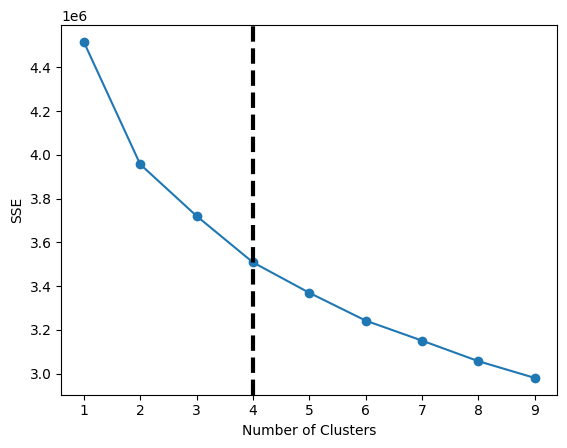

In [27]:
#Plot the graph
plt.plot(num_clusters , inertia , 'o-')    
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
#plot vertical line at the elbow spot
plt.axvline(x=K_cost_c3, color='black', label='axvline-fullheight', ls='--', linewidth=3)

In [29]:
model = KMeans(n_clusters = 4)
model.fit(df1)

C:\Users\fredr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

#### Cluster analysis

In [30]:
#assign cluster in data set
df1['cluster'] = model.labels_
# +1 cluster
df1['cluster'] = df1['cluster'].apply(lambda x : x+1)

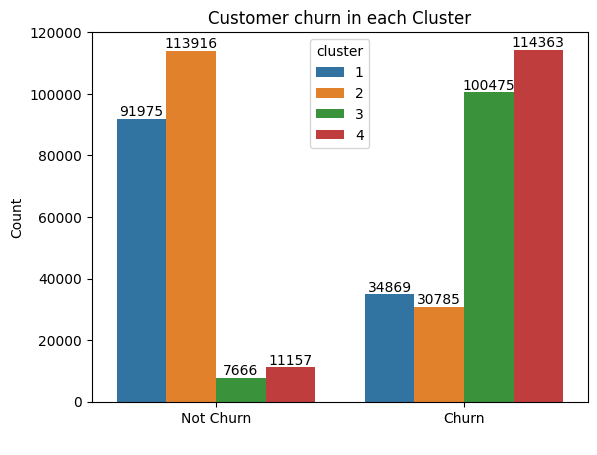

In [31]:
ax = sns.countplot(df1 , x = 'Churn' , hue = 'cluster')
plt.title('Customer churn in each Cluster')
plt.xticks(ticks = [0  , 1] , labels = ['Not Churn','Churn'])
plt.xlabel(' ')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i)

We can see from the graph that Customers that stays are mainly in cluster 4, whilst the ones who leaves are in cluster 2

#### Visualizing cluster 2

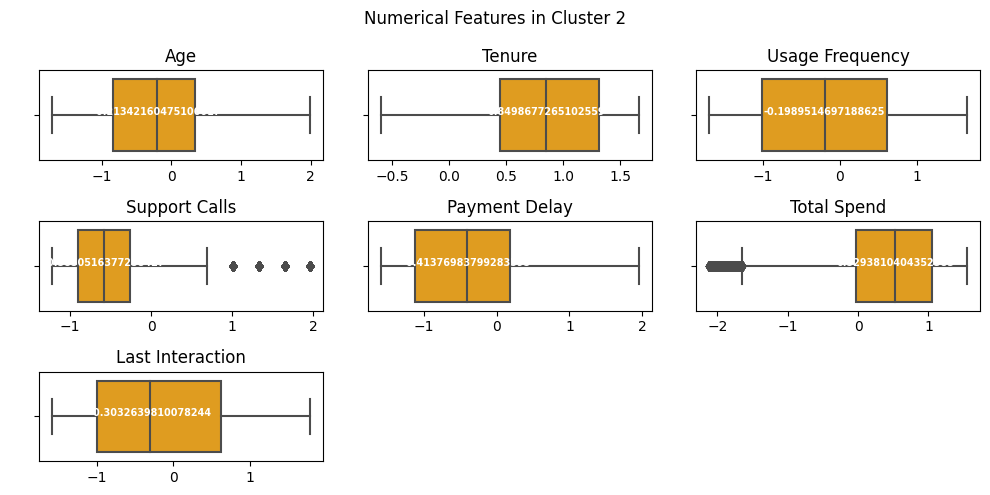

In [35]:
cluster_1 = df1[df1['cluster'] == 2]
# Check numerical columns
cluster_1_num = cluster_1.select_dtypes(['float64' , 'int64'])
cluster_1_num = cluster_1[['Age', 'Tenure', 'Usage Frequency', 'Support Calls','Payment Delay', 'Total Spend', 'Last Interaction']]

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features in Cluster 2')
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = cluster_1_num , x = j , color = 'orange')
    #Calculate median
    median = cluster_1_num[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()

#### Visualizing cluster 4

### Logistic Regression 

#### Preprocessing for Logistic Regression

In [40]:
df2 = df.copy()
df2

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [41]:
# Drop unused column
df2.drop(columns = 'CustomerID' , inplace = True)

In [9]:
df2

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [42]:
# Creating dummy variables for the categorical variables
df2 = pd.get_dummies(df2, columns=['Subscription Type'], prefix='Subscription Type')
df2 = pd.get_dummies(df2, columns=['Gender'], prefix='Gender')
df2 = pd.get_dummies(df2, columns=['Contract Length'], prefix='Contract Length')

In [11]:
df2

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Gender_Female,Gender_Male,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0,0,1,1,0,1,0,0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,0,1,0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,0,1,0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,0,0,1,0,1,0,1,0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45.0,33.0,12.0,6.0,21.0,947.0,14.0,1.0,1,0,0,1,0,0,0,1
64370,37.0,6.0,1.0,5.0,22.0,923.0,9.0,1.0,0,0,1,0,1,1,0,0
64371,25.0,39.0,14.0,8.0,30.0,327.0,20.0,1.0,0,1,0,0,1,0,1,0
64372,50.0,18.0,19.0,7.0,22.0,540.0,13.0,1.0,0,0,1,1,0,0,1,0


In [43]:
# Scaling the numerical features 
# Numerical features
num = df2[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
           'Payment Delay', 'Total Spend', 'Last Interaction']]

# Scaler 
scaler = StandardScaler()
scaled_num = scaler.fit_transform(num)  # Scale the numerical features

# Replace the original columns with scaled values
df2[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
     'Payment Delay', 'Total Spend', 'Last Interaction']] = scaled_num


df2.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Gender_Female,Gender_Male,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,-0.765883,0.443776,-0.198951,0.372314,0.532844,1.271517,0.277572,1.0,0,0,1,1,0,1,0,0
1,1.996425,1.023907,-1.707192,1.967923,-0.650423,-0.257105,-1.000267,1.0,1,0,0,1,0,0,1,0
2,1.207194,-1.006554,-1.359137,0.691436,0.532844,-1.773498,-1.348769,1.0,1,0,0,1,0,0,0,1
3,1.443963,0.385762,0.613178,1.010558,-0.768750,-0.913393,1.671579,1.0,0,0,1,0,1,0,1,0
4,-1.318345,0.037683,0.497160,0.372314,-0.650423,-0.012526,0.626074,1.0,1,0,0,0,1,0,1,0


In [44]:
# defining independet variables and target variable 
X = df2.drop(columns=['Churn'])
y = df2['Churn']

# Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.3 , random_state = 45)

(            Age    Tenure  Usage Frequency  Support Calls  Payment Delay  \
 0     -0.765883  0.443776        -0.198951       0.372314       0.532844   
 1      1.996425  1.023907        -1.707192       1.967923      -0.650423   
 2      1.207194 -1.006554        -1.359137       0.691436       0.532844   
 3      1.443963  0.385762         0.613178       1.010558      -0.768750   
 4     -1.318345  0.037683         0.497160       0.372314      -0.650423   
 ...         ...       ...              ...            ...            ...   
 64369  0.417963  0.095696        -0.430988       0.691436       0.887824   
 64370 -0.213422 -1.470659        -1.707192       0.372314       1.006150   
 64371 -1.160499  0.443776        -0.198951       1.329679       1.952764   
 64372  0.812578 -0.774501         0.381141       1.010558       1.006150   
 64373  0.970425  0.791855        -0.082933       1.648801       1.361130   
 
        Total Spend  Last Interaction  Subscription Type_Basic  \
 0      

In [91]:
y.isna().sum()

0

In [94]:
Y_train.isna().sum()

0

In [99]:
# Check the shapes of each dataframe.
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(378904, 15) (126302, 15) (378904,) (126302,)


In [100]:
# We will perform feature selection by using feature importance method.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 25 , random_state = 45)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=25, random_state=45)

<AxesSubplot: >

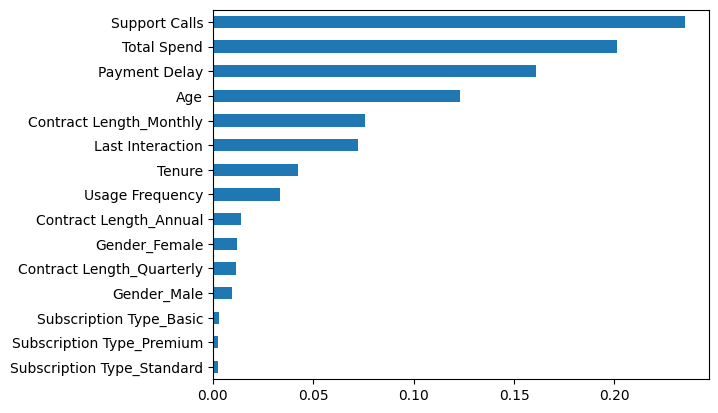

In [101]:
featureimp = pd.Series(model.feature_importances_ , index = X.columns).sort_values(ascending = True)
featureimp.plot(kind = 'barh')

#### Logistic Regression classification

In [23]:
# Evaluation function that prints classification report and confusion matrix
def evaluate(y_test, y_pred, model_name):
    # Creating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Priting the model name
    print(f"\033[34m{model_name}\033[0m")

    # Print the classification report
    print(f" \033[32mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred))
    print(f" \033[32mConfusion Matrix:\033[0m")
    
    # Print the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Logistic Regression: Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [50]:
# Initialising Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

LogisticRegression()
 Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83     67430
         1.0       0.87      0.85      0.86     84132

    accuracy                           0.85    151562
   macro avg       0.85      0.85      0.85    151562
weighted avg       0.85      0.85      0.85    151562

 Confusion Matrix:


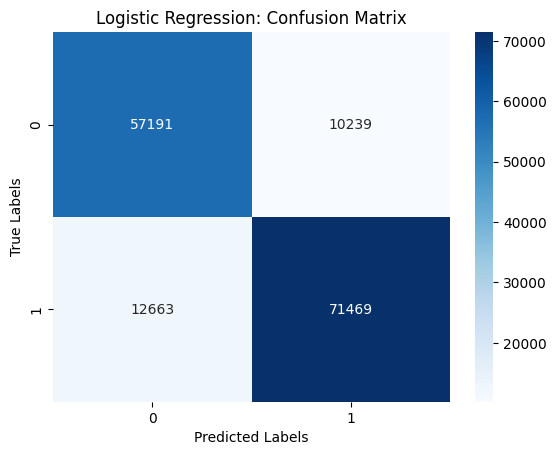

In [51]:
y_pred = lr.predict(X_test)
# Evaluating the results 
evaluate(Y_test, y_pred, lr)

#### Feature importance

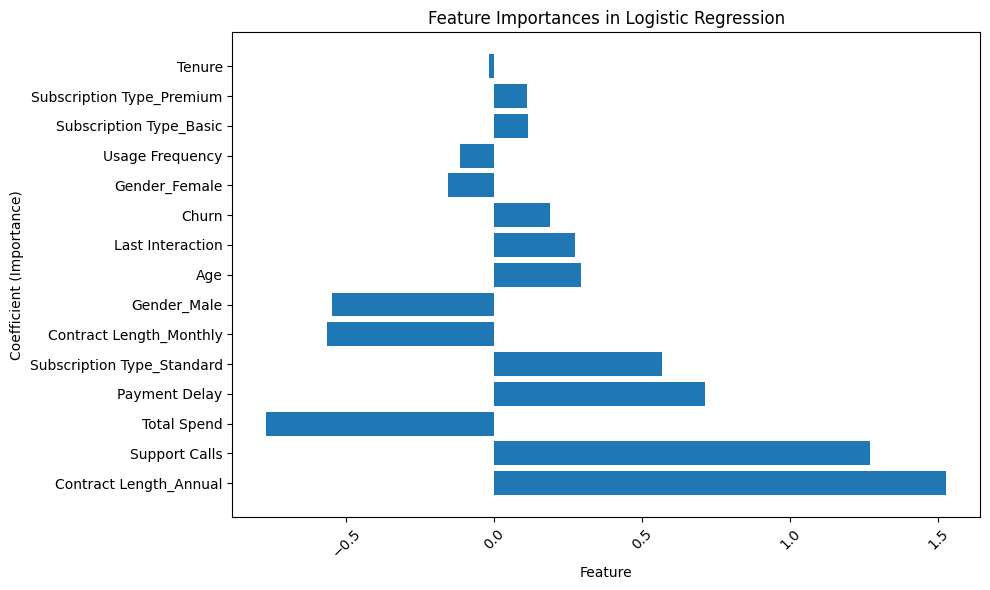

In [74]:
# Feature importance 
#getting the coefficients 
coef = lr.coef_[0]

#getting the absolute values of coefficients for ranking 
abs_coef = np.abs(coef)

#sorting the features after importance
sorted_indices = np.argsort(abs_coef)[::-1]
sorted_coef = coef[sorted_indices]

#getting feature names
feature_names = list(df2.columns)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), sorted_coef, tick_label=[feature_names[i] for i in sorted_indices])
plt.xlabel('Feature')
plt.ylabel('Coefficient (Importance)')
plt.title('Feature Importances in Logistic Regression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

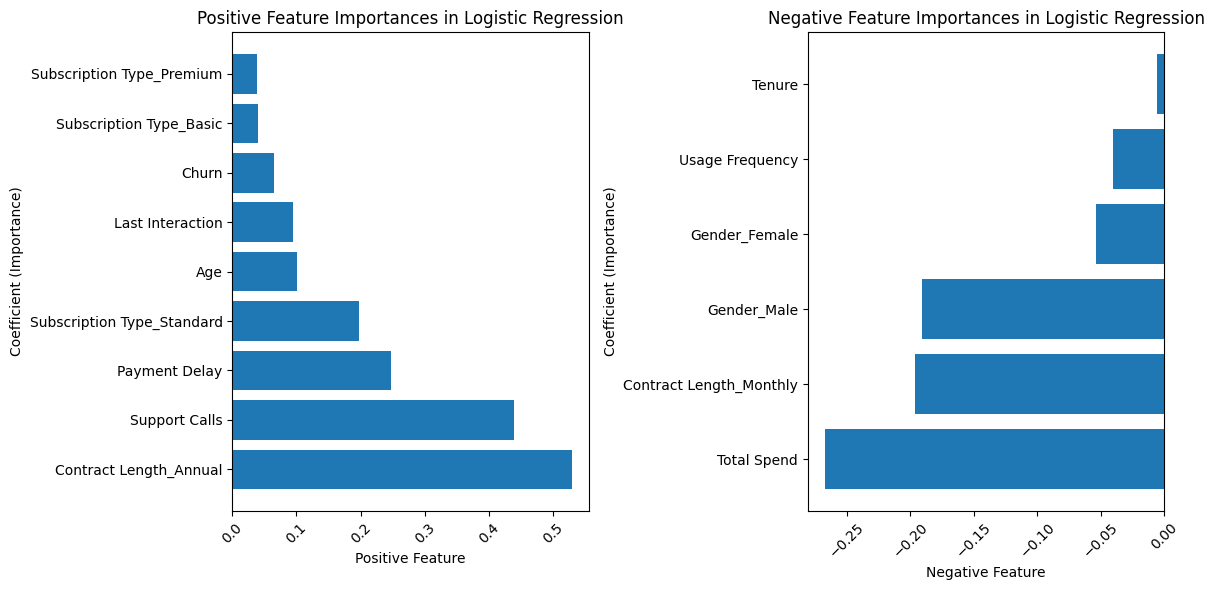

In [90]:
# Getting the coefficients 
coef = lr.coef_[0]

# Get the indices of positive and negative coefficients
positive_indices = np.where(coef > 0)[0]
negative_indices = np.where(coef < 0)[0]

# Sorting positive coefficients in descending order
sorted_positive_indices = np.argsort(coef[positive_indices])[::-1]
sorted_positive_coef = coef[positive_indices][sorted_positive_indices]

# Sorting negative coefficients in descending order
sorted_negative_indices = np.argsort(coef[negative_indices])
sorted_negative_coef = coef[negative_indices][sorted_negative_indices]

# Getting feature names (assuming your features are stored in a DataFrame named 'df2')
feature_names = list(df2.columns)

# Create two separate bar charts for positive and negative coefficients
plt.figure(figsize=(12, 6))

# Positive coefficients
plt.subplot(1, 2, 1)
plt.barh(range(len(sorted_positive_indices)), sorted_positive_coef, 
        tick_label=[feature_names[i] for i in positive_indices[sorted_positive_indices]])
plt.xlabel('Positive Feature')
plt.ylabel('Coefficient (Importance)')
plt.title('Positive Feature Importances in Logistic Regression')
plt.xticks(rotation=45)

# Negative coefficients
plt.subplot(1, 2, 2)
plt.barh(range(len(sorted_negative_indices)), sorted_negative_coef, 
        tick_label=[feature_names[i] for i in negative_indices[sorted_negative_indices]])
plt.xlabel('Negative Feature')
plt.ylabel('Coefficient (Importance)')
plt.title('Negative Feature Importances in Logistic Regression')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [64]:
coef = lr.coef_[0]

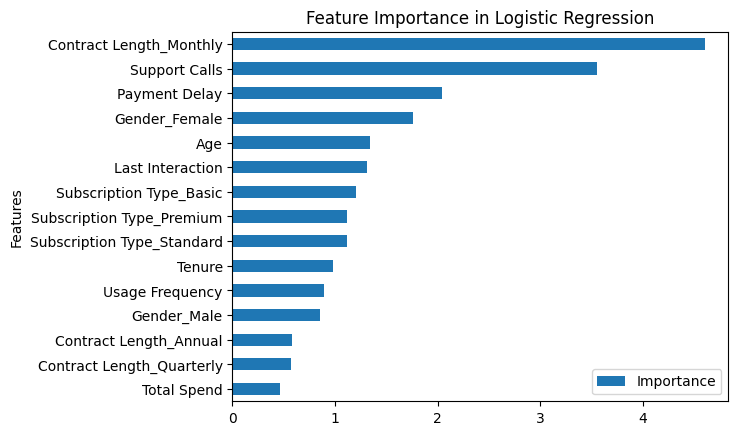

In [73]:
# Feature importance
feature_names = list(X.columns)
feature_importance = pd.DataFrame(feature_names, columns=['Features'])
feature_importance['Importance'] = pow(math.e, coef)
feature_importance = feature_importance.sort_values(by=['Importance'], ascending=True)

ax = feature_importance.plot.barh(x='Features', y='Importance')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Churn Risk Rating 

In [75]:
# Predict probabilities for test data
predicted_probabilities = lr.predict_proba(X_test)[:, 1]

# Define churn risk bucket boundaries (adjust as needed)
bucket_boundaries = np.linspace(0, 1, num=11)  # 10 buckets

# Assign customers to churn risk buckets
churn_risk_buckets = np.digitize(predicted_probabilities, bucket_boundaries)

In [76]:
X_test['Churn Risk'] = churn_risk_buckets

   Churn Risk Bucket  Number of Customers
0                  1                18637
1                  2                20165
2                  3                13527
3                  4                 9678
4                  5                 7847
5                  6                 7273
6                  7                 7655
7                  8                 9450
8                  9                14604
9                 10                42726


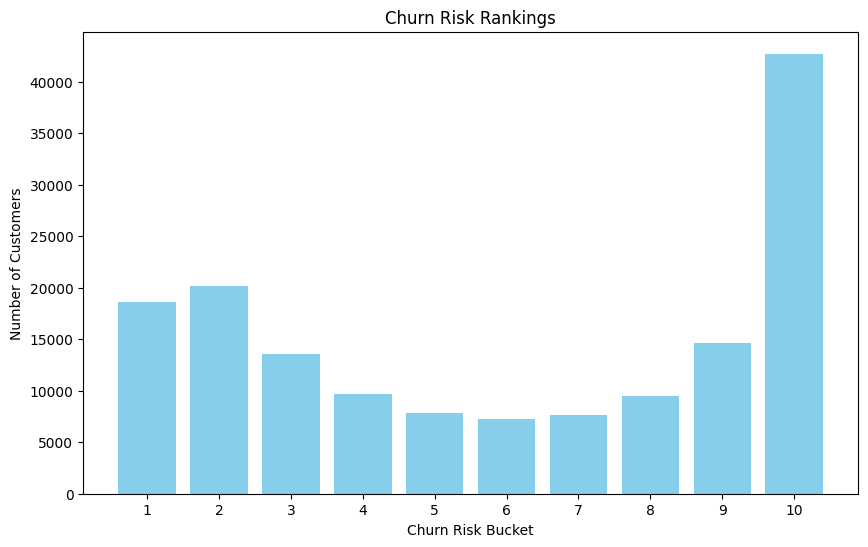

In [77]:
# Create a DataFrame to store churn risk rankings
churn_risk_df = pd.DataFrame({'CustomerID': X_test.index, 'Churn Risk': churn_risk_buckets})

# Count the number of customers in each bucket
bucket_counts = churn_risk_df['Churn Risk'].value_counts().sort_index()

# Create a table to display churn risk rankings
churn_risk_table = pd.DataFrame({'Churn Risk Bucket': bucket_counts.index, 'Number of Customers': bucket_counts.values})

# Sort the table by churn risk bucket
churn_risk_table = churn_risk_table.sort_values(by='Churn Risk Bucket')

# Display the churn risk table
print(churn_risk_table)

# Create a bar chart to visualize churn risk rankings
plt.figure(figsize=(10, 6))
plt.bar(churn_risk_table['Churn Risk Bucket'], churn_risk_table['Number of Customers'], color='skyblue')
plt.xlabel('Churn Risk Bucket')
plt.ylabel('Number of Customers')
plt.title('Churn Risk Rankings')
plt.xticks(churn_risk_table['Churn Risk Bucket'])
plt.show()

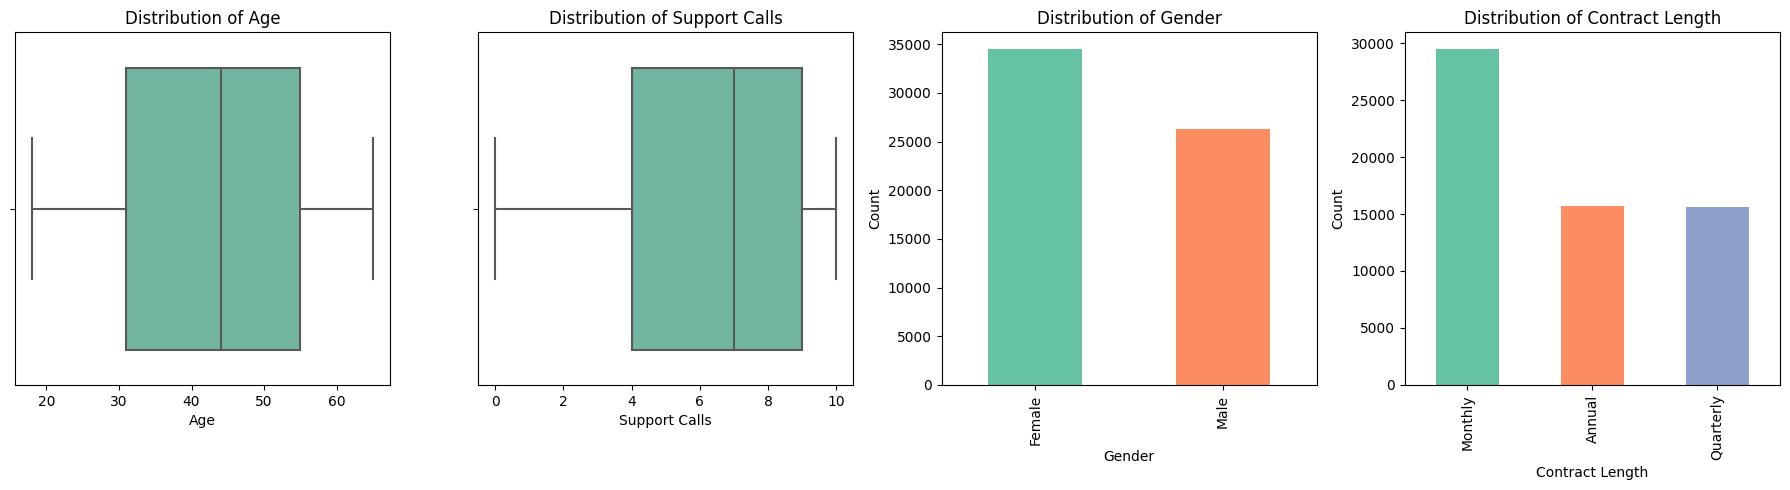

In [89]:
# Define a custom color palette with distinct colors for all categories
custom_palette = sns.color_palette("Set2")

# Find customers in rank 10 (highest churn risk)
rank_10_customers = churn_risk_df[churn_risk_df['Churn Risk'] == 10]

# Get the indices of these customers
rank_10_indices = rank_10_customers['CustomerID']

# Select numerical and categorical features to analyze
numerical_features = ['Age', 'Support Calls']
categorical_features = ['Gender', 'Contract Length']

# Create subplots for visualizing features
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features) + len(categorical_features), figsize=(18, 5))

# Plot each numerical feature using box plots
for i, feature in enumerate(numerical_features):
    # Create a box plot for the numerical feature
    sns.boxplot(x=feature, data=df.loc[rank_10_indices], ax=axes[i], color=custom_palette[0])
    axes[i].set_title(f'Distribution of {feature}')

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    # Calculate the distribution of values for the feature in the original dataset
    feature_distribution = df.loc[rank_10_indices, feature].value_counts()
    
    # Create a bar chart for the feature
    if feature == 'Gender':
        # For 'Gender,' use a bar chart and specify custom colors
        feature_distribution.plot(kind='bar', ax=axes[len(numerical_features) + i], color=custom_palette)
        axes[len(numerical_features) + i].set_xlabel(feature)
        axes[len(numerical_features) + i].set_ylabel('Count')
        axes[len(numerical_features) + i].set_title(f'Distribution of {feature}')
    elif len(feature_distribution) <= 2:
        # For binary features like "Contract Length," use a pie chart
        axes[len(numerical_features) + i].pie(feature_distribution, labels=feature_distribution.index, autopct='%1.1f%%', startangle=90)
        axes[len(numerical_features) + i].set_title(f'Distribution of {feature}')
    else:
        # For features with more than two categories, use a bar chart
        feature_distribution.plot(kind='bar', ax=axes[len(numerical_features) + i], color=custom_palette)
        axes[len(numerical_features) + i].set_xlabel(feature)
        axes[len(numerical_features) + i].set_ylabel('Count')
        axes[len(numerical_features) + i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()